In [1]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing
import sys
sys.path.append("../src")
from os.path import join
from results import prefix

# Results
import results
reload(results)
print 'Done.'

Done.


In [2]:
Results = results.Results
ID = 1

date = '2016_07_18'
r = Results(date, ID)
print join('/home/luka/v/lm1015-tmp/data',join(date,prefix(ID,3)))
r.print_auto_results()
r.print_config()

Aim:
Network Search
/home/luka/v/lm1015-tmp/data/2016_07_18/001
Mean squared error for autoencoder on test set:
final : 1.824
early : 0.108
autoencoder


function,step
step_percent,0.8
constant,1.0
poly_order,1
decoder,auto_fc_1


weights


weights initialisation,"['std_dev', 0.001]"
bias initial value,0.01


global


dropout_rate,1.0
optimizer,adam
seed_randomness,True
fc2_neuron_count,0
learning_rate,0.001
batch_size,100
final_activation,softmax
fc1_neuron_count,0
seed,1
iterations,1000
dump_frames,False


data


image_region,full
remove_empty_labels,True
validation_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
batch_randomisation,True
dataset,disfa
image_shape,"[47, 47]"
train_subjects,"[2, 4, 6, 8, 10, 12, 16, 18, 23, 25, 27, 29, 31]"
test_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
disfa_au_map,"[1, 2, 4, 5, 6, 9, 12, 15, 17, 20, 25, 26]"
threshold,1
normalisation_type,none


results


early_stop_iteration,800


crop


crop,"[0, 0, 0, 0]"
resize_scale,0.4


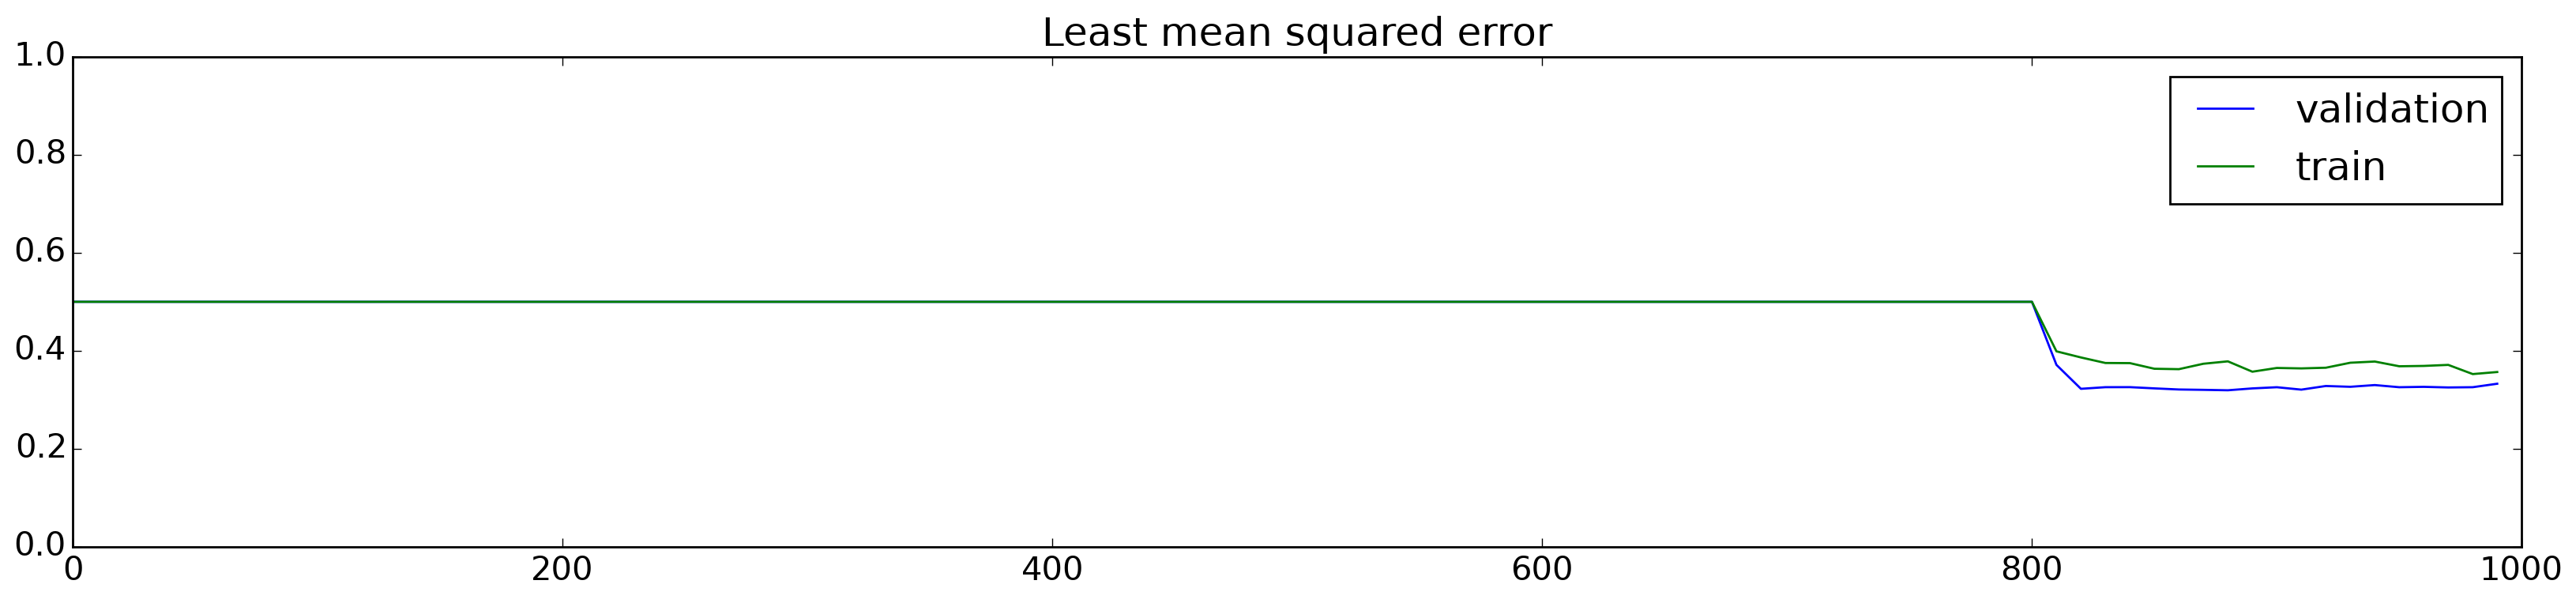

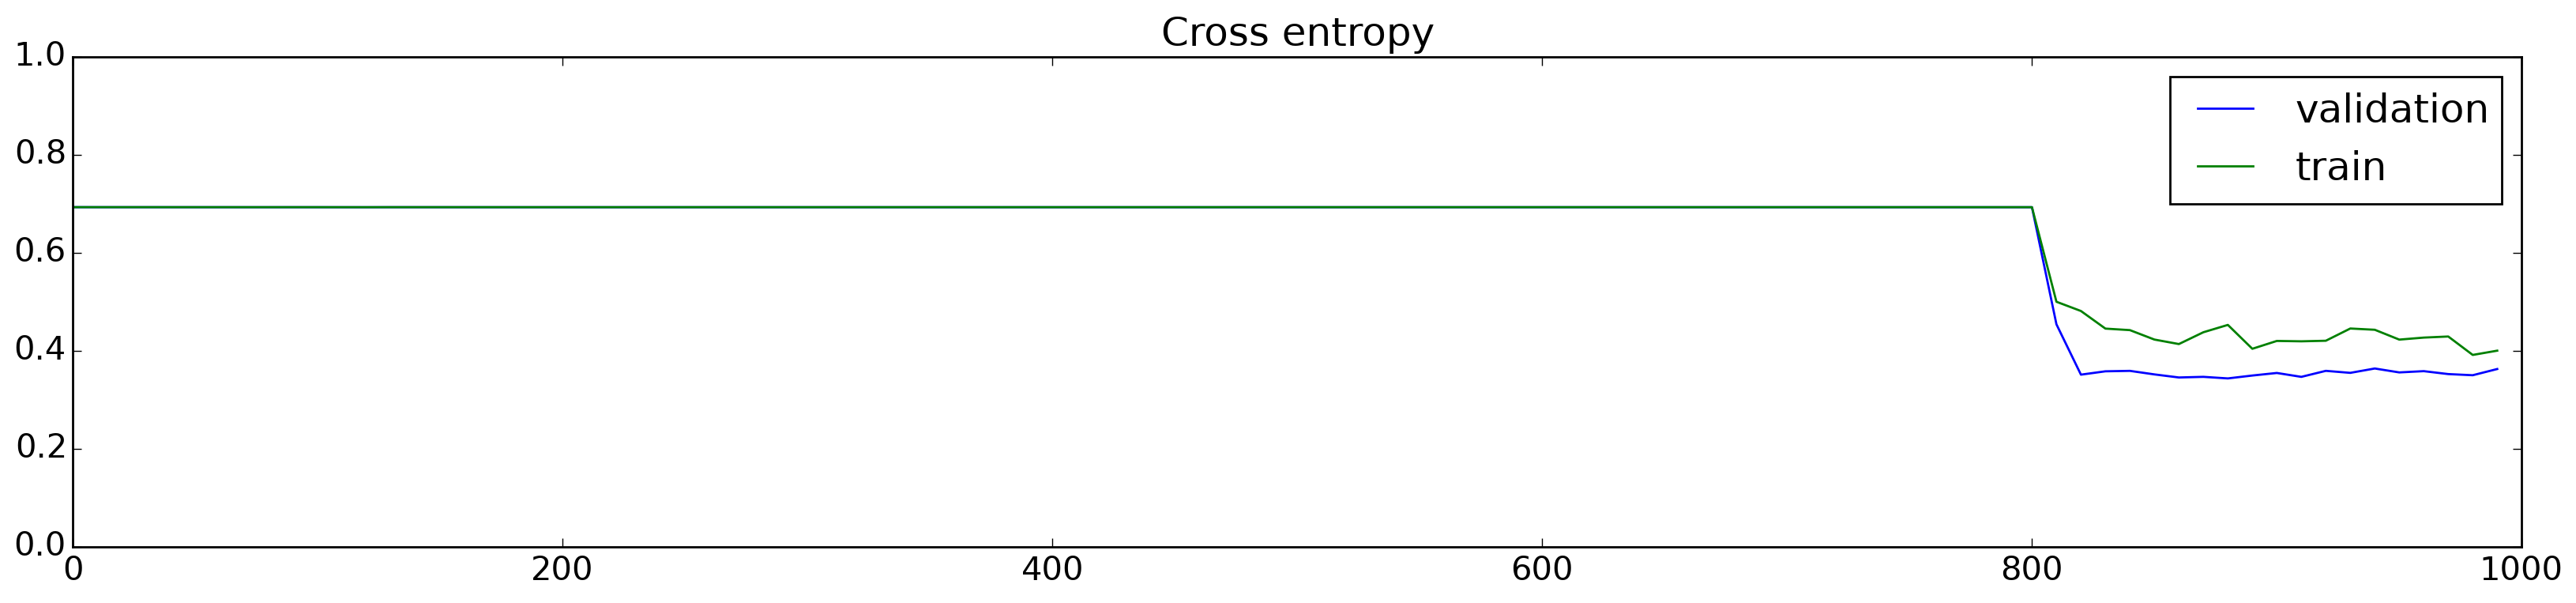

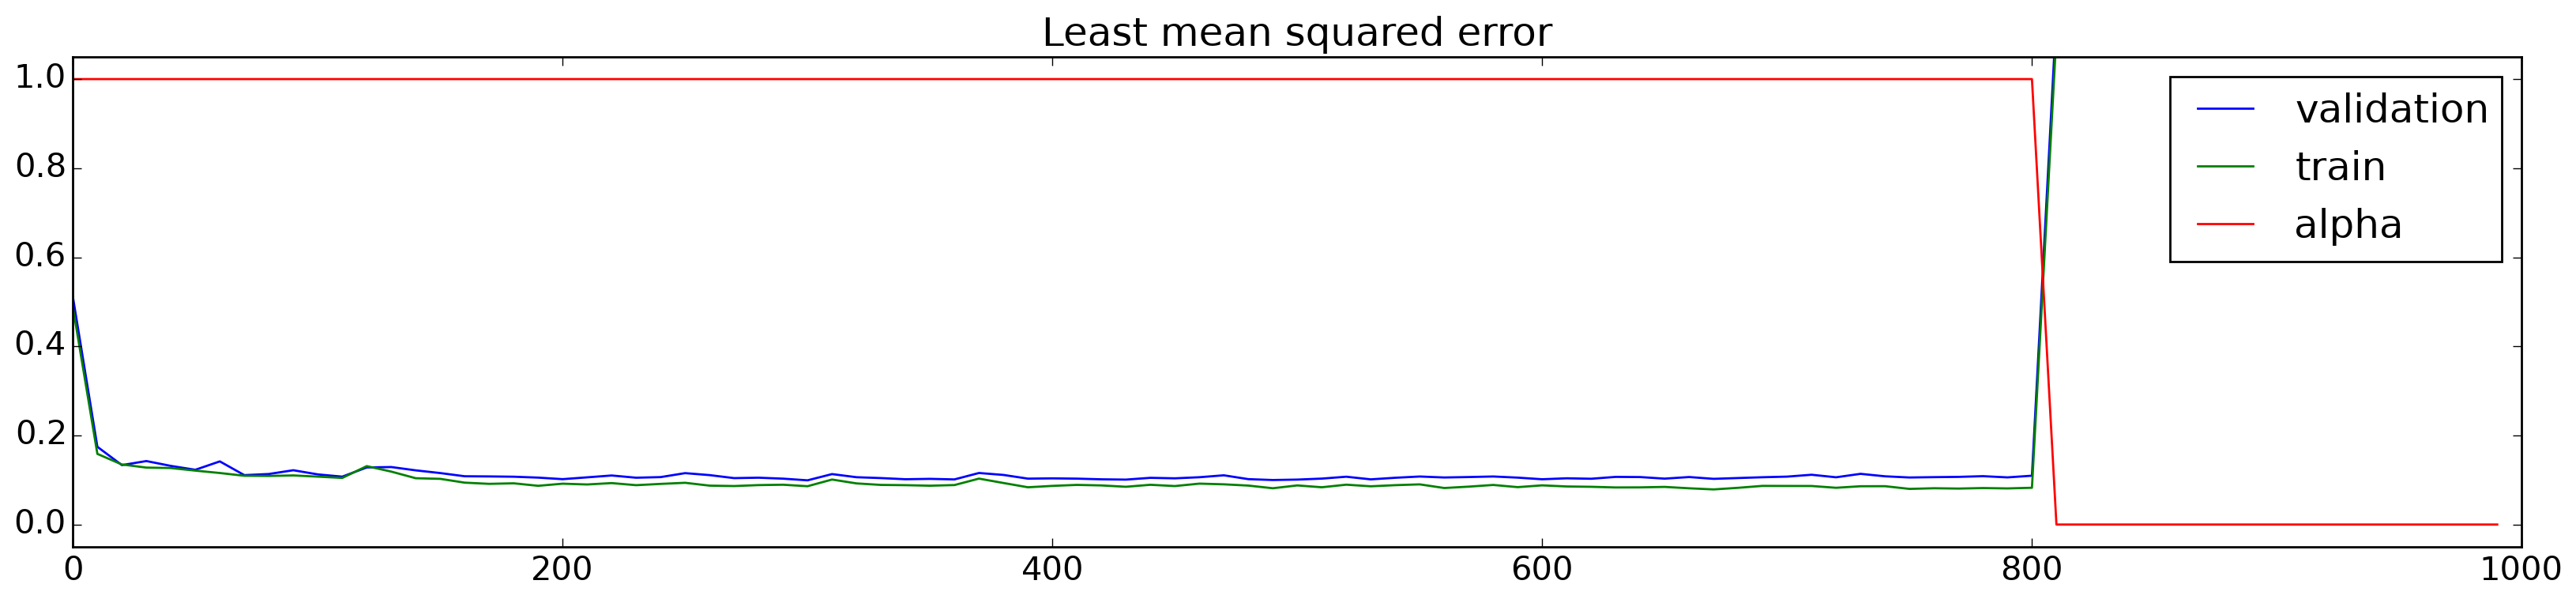

In [3]:
r.lmsq()
r.cross()
r.auto()

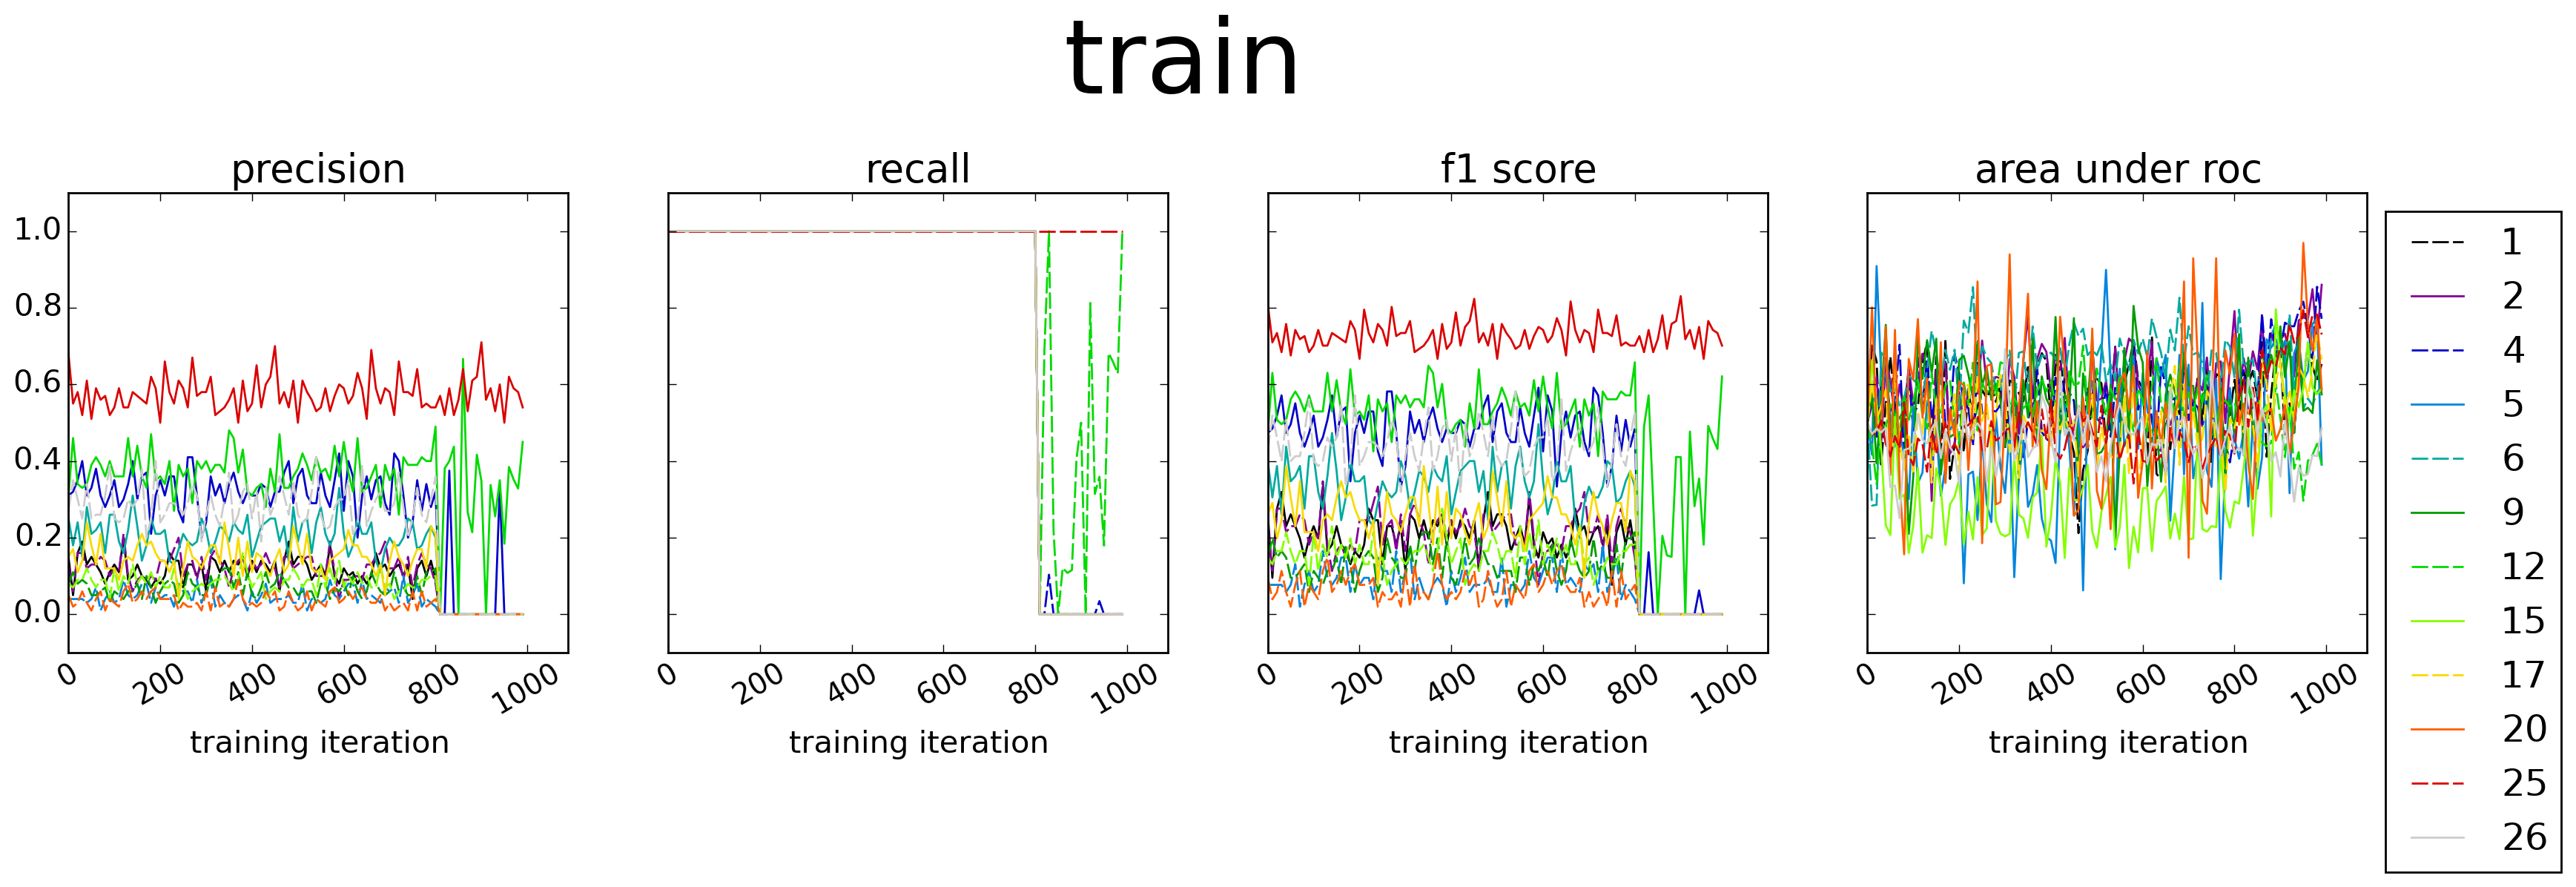

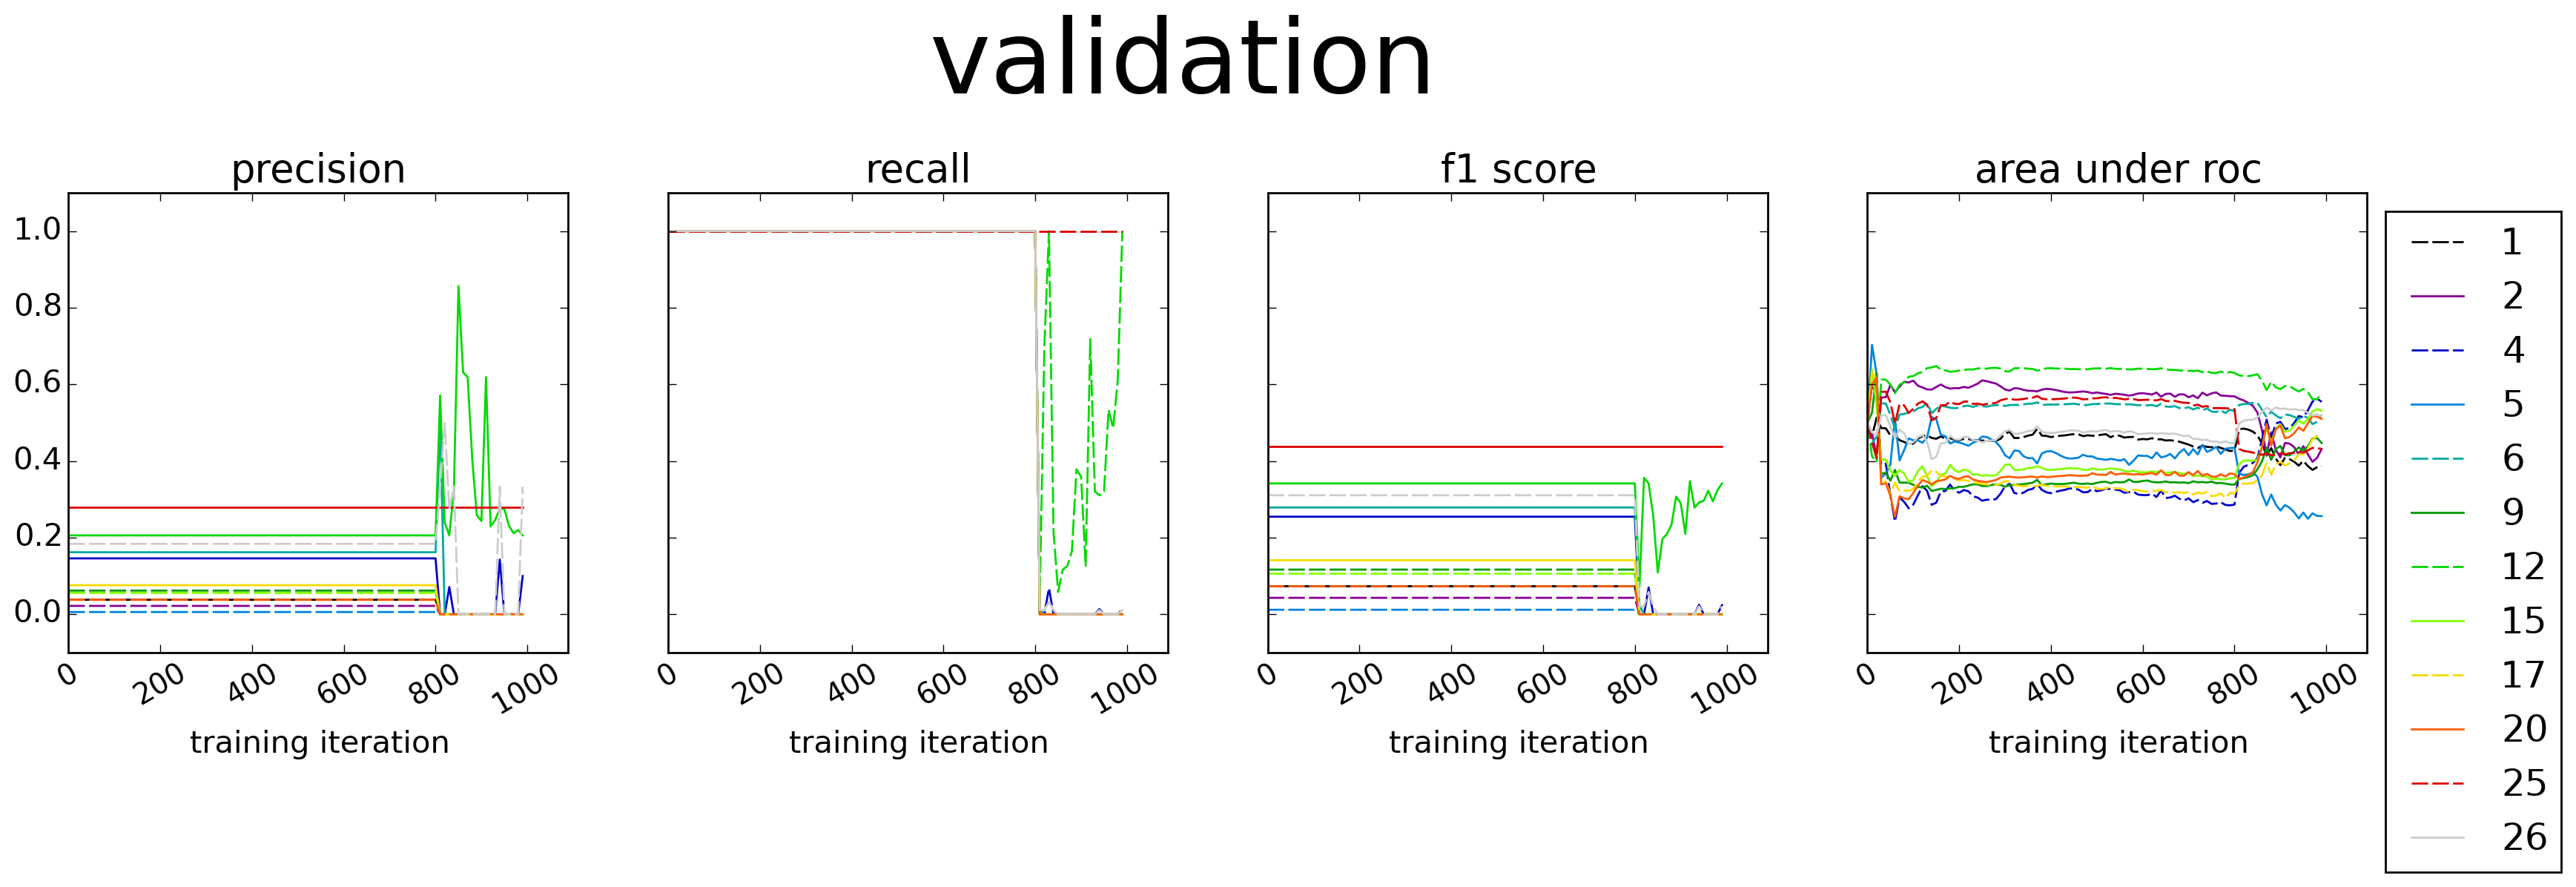

In [4]:
r.au('train',smooth=False)
r.au('validation',smooth=False)
# r.roc_plot('final')
# r.roc_plot('early')
# r.test_confusion('early')

# Test set:

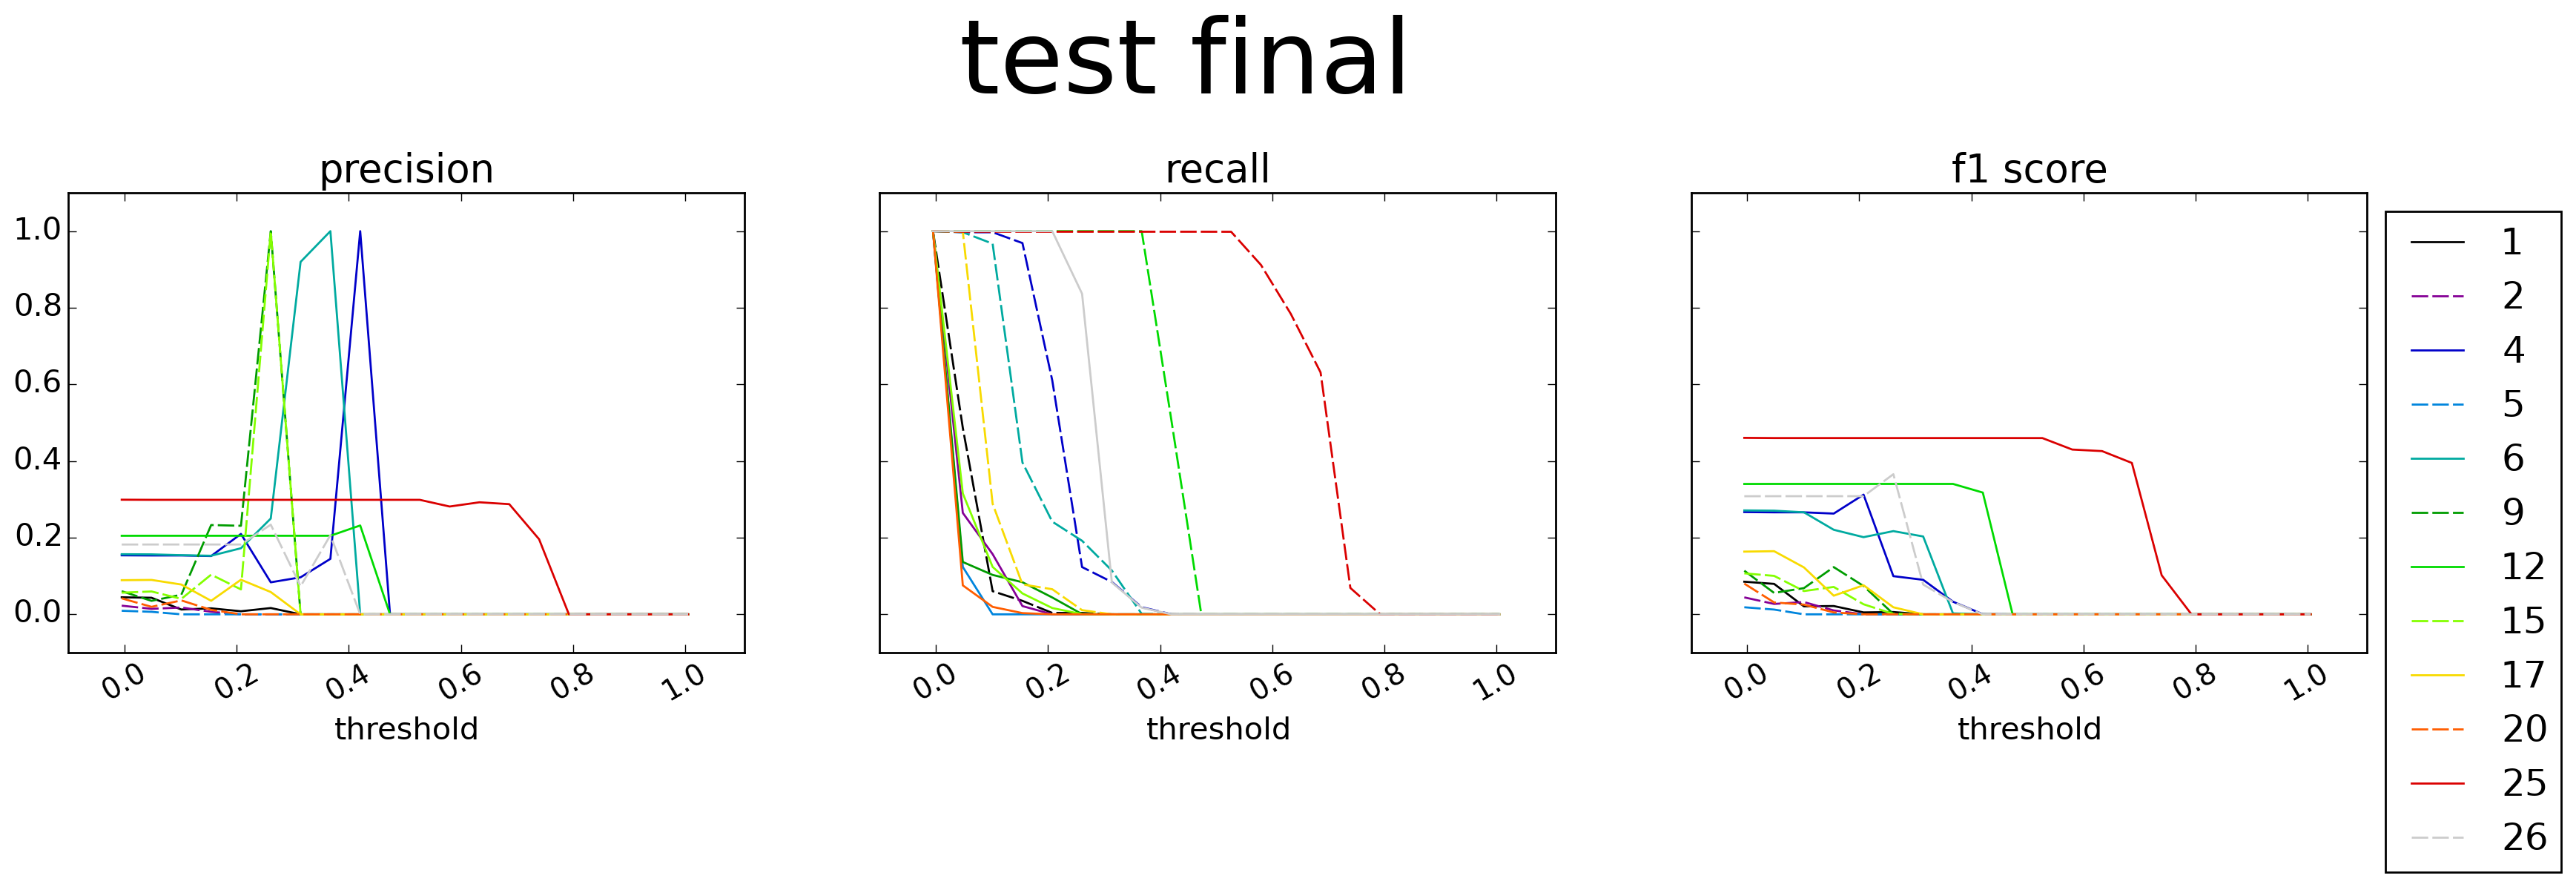

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.45 	fail 	0.09 	0.04 	1.0
2 	0.47 	fail 	0.04 	0.02 	1.0
4 	0.53 	fail 	0.31 	1.0 	1.0
5 	0.4 	fail 	0.02 	0.01 	1.0
6 	0.54 	fail 	0.27 	1.0 	1.0
9 	0.41 	fail 	0.12 	1.0 	1.0
12 	0.58 	fail 	0.34 	0.23 	1.0
15 	0.53 	fail 	0.11 	1.0 	1.0
17 	0.49 	fail 	0.16 	0.09 	1.0
20 	0.56 	fail 	0.08 	0.04 	1.0
25 	0.4 	fail 	0.46 	0.3 	1.0
26 	0.53 	fail 	0.37 	0.23 	1.0
average f1 =  0.197745139165
average roc =  0.492040072083


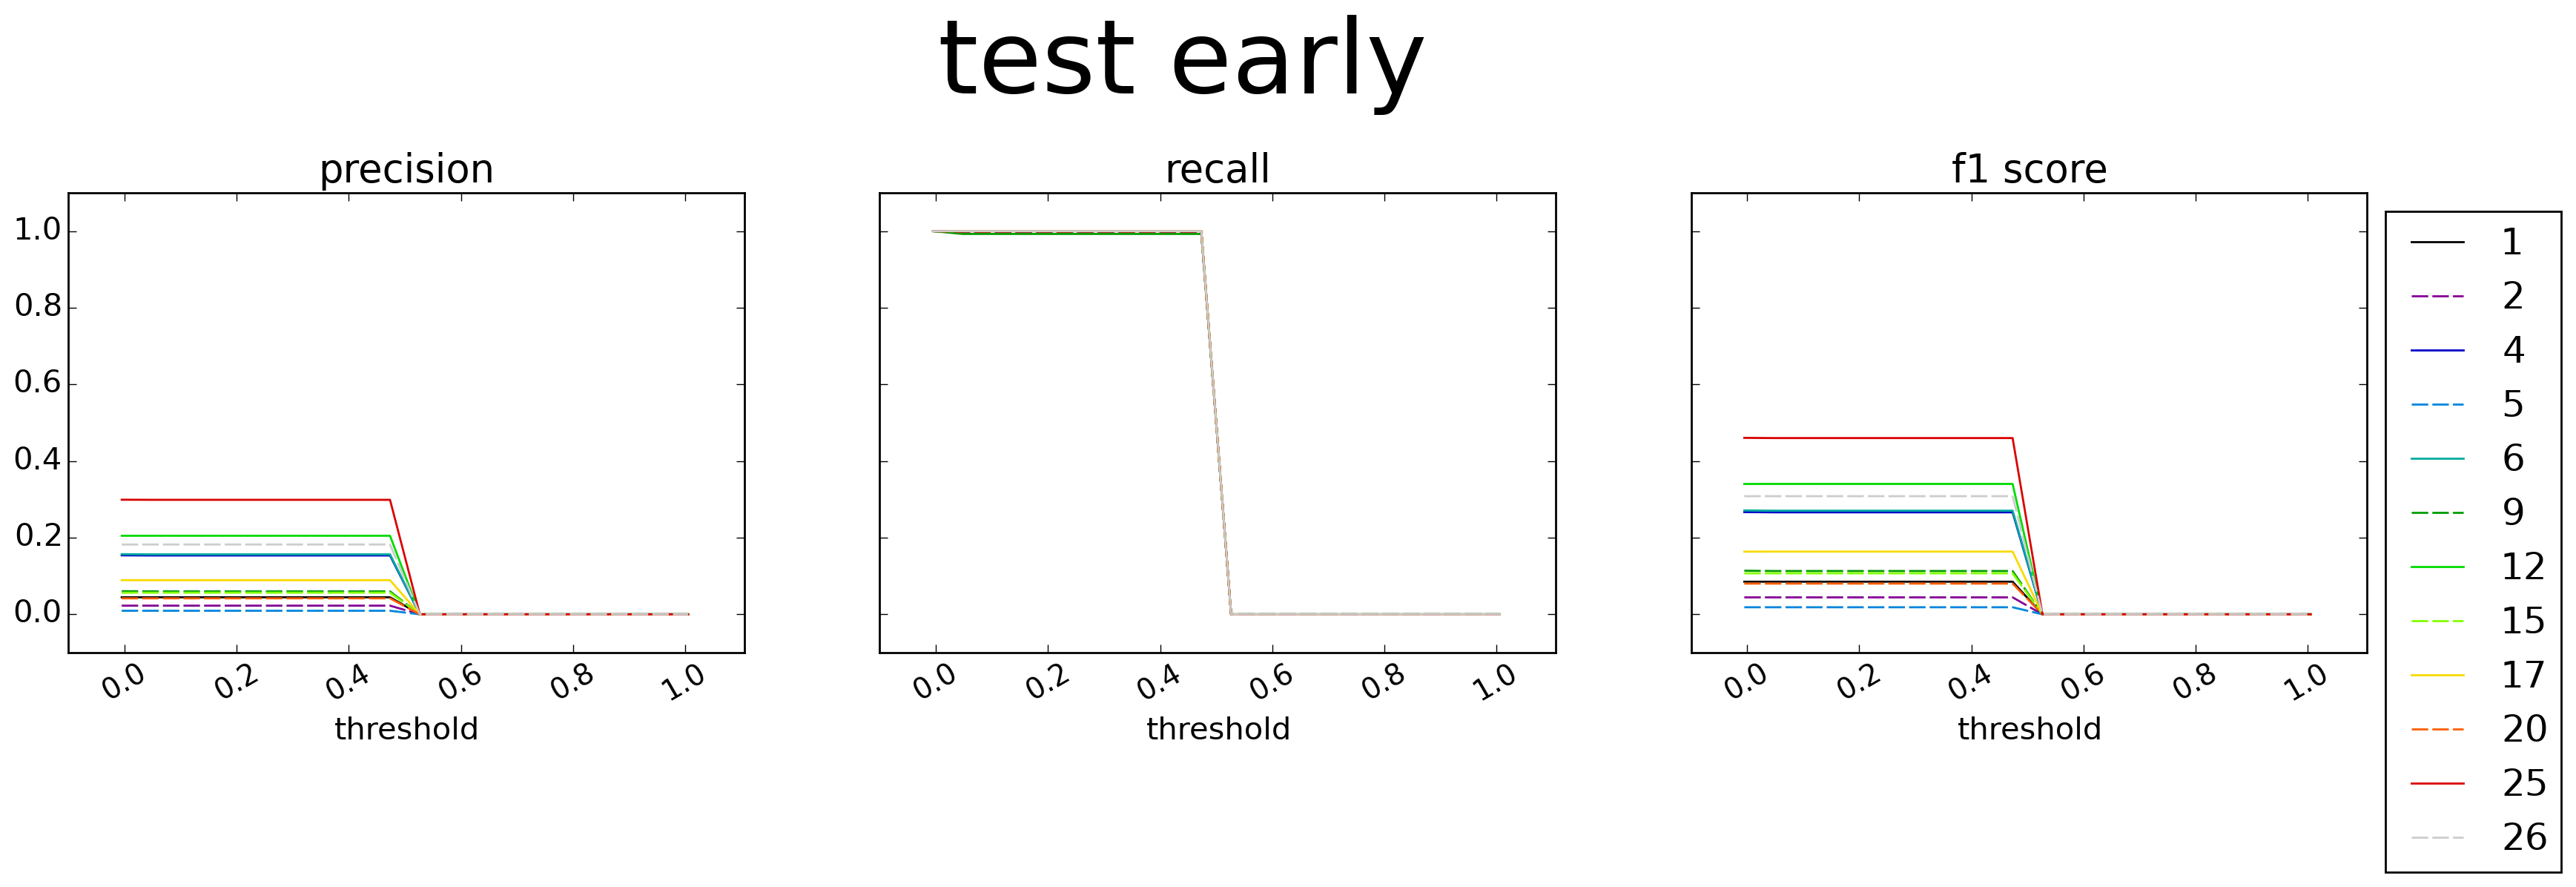

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.4 	fail 	0.09 	0.04 	1.0
2 	0.46 	fail 	0.04 	0.02 	1.0
4 	0.29 	fail 	0.27 	0.15 	1.0
5 	0.43 	fail 	0.02 	0.01 	1.0
6 	0.53 	fail 	0.27 	0.16 	1.0
9 	0.34 	fail 	0.11 	0.06 	1.0
12 	0.66 	poor 	0.34 	0.21 	1.0
15 	0.37 	fail 	0.11 	0.06 	1.0
17 	0.28 	fail 	0.16 	0.09 	1.0
20 	0.41 	fail 	0.08 	0.04 	1.0
25 	0.55 	fail 	0.46 	0.3 	1.0
26 	0.45 	fail 	0.31 	0.18 	1.0
average f1 =  0.188311970747
average roc =  0.43089640443


In [5]:
r.au('test',smooth=False,model='final')
r.au('test',smooth=False,model='early')

In [6]:
r.test_confusion('final')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  1 threshold:  -0.01
	[  3015 	 0 	]
	[  64815 	 0 	]
	roc:	0.45
	f1:	0.09
	p:	0.04
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  2 threshold:  -0.01
	[  1534 	 0 	]
	[  66296 	 0 	]
	roc:	0.47
	f1:	0.04
	p:	0.02
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  4 threshold:  0.21
	[  6376 	 4067 	]
	[  24013 	 33374 	]
	roc:	0.53
	f1:	0.31
	p:	0.21
	r:	0.61
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  5 threshold:  -0.01
	[  631 	 0 	]
	[  67199 	 0 	]
	roc:	0.4
	f1:	0.02
	p:	0.01
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  6 threshold:  -0.01
	[  10640 	 0 	]
	[  57190 	 0 	]
	roc:	0.54
	f1:	0.27
	p:	0.16
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  9 threshold:  0.15
	[  343 	 3751 	]
	[  1129 	 62607 	]
	roc:	0.41
	f1:	0.12
	p:	0.23
	r:	0.08
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.05
	[  13903 	 0 	]
	[  53897 	 30 	]
	roc:	0.58
	f1:	0.34
	p:	0.21
	r:	1.0
~~~~~~~~~~~~~~

## 

early model
error =  25.17 %


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


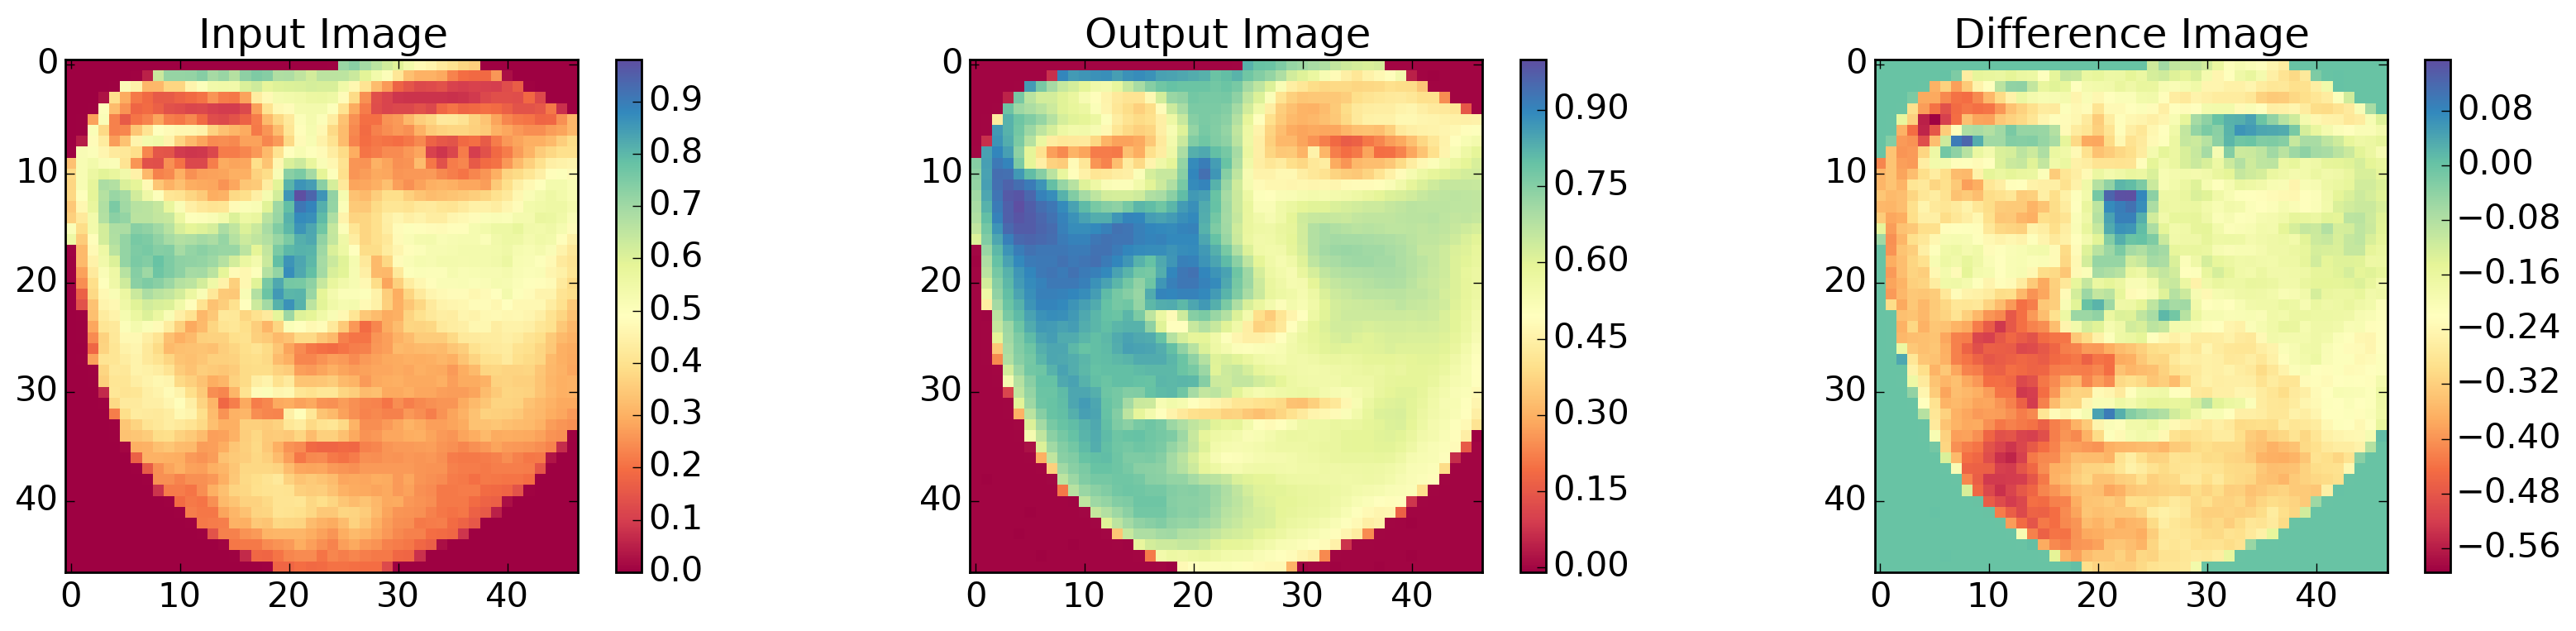

error =  8.18 %


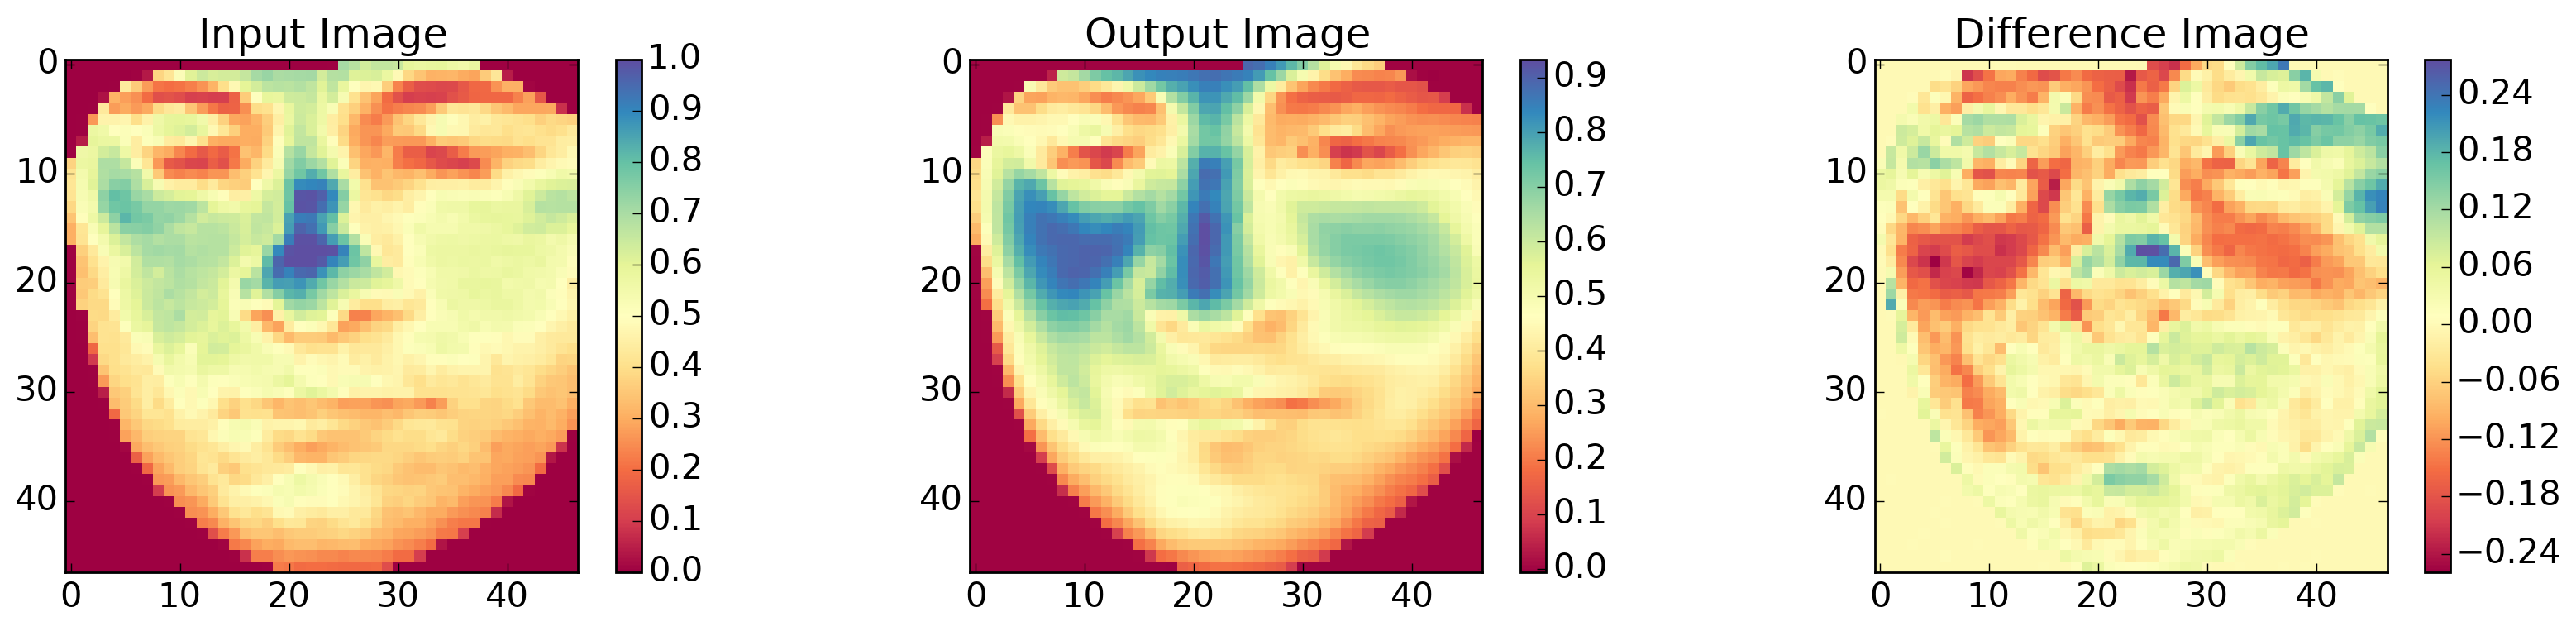

final model
error =  195.71 %


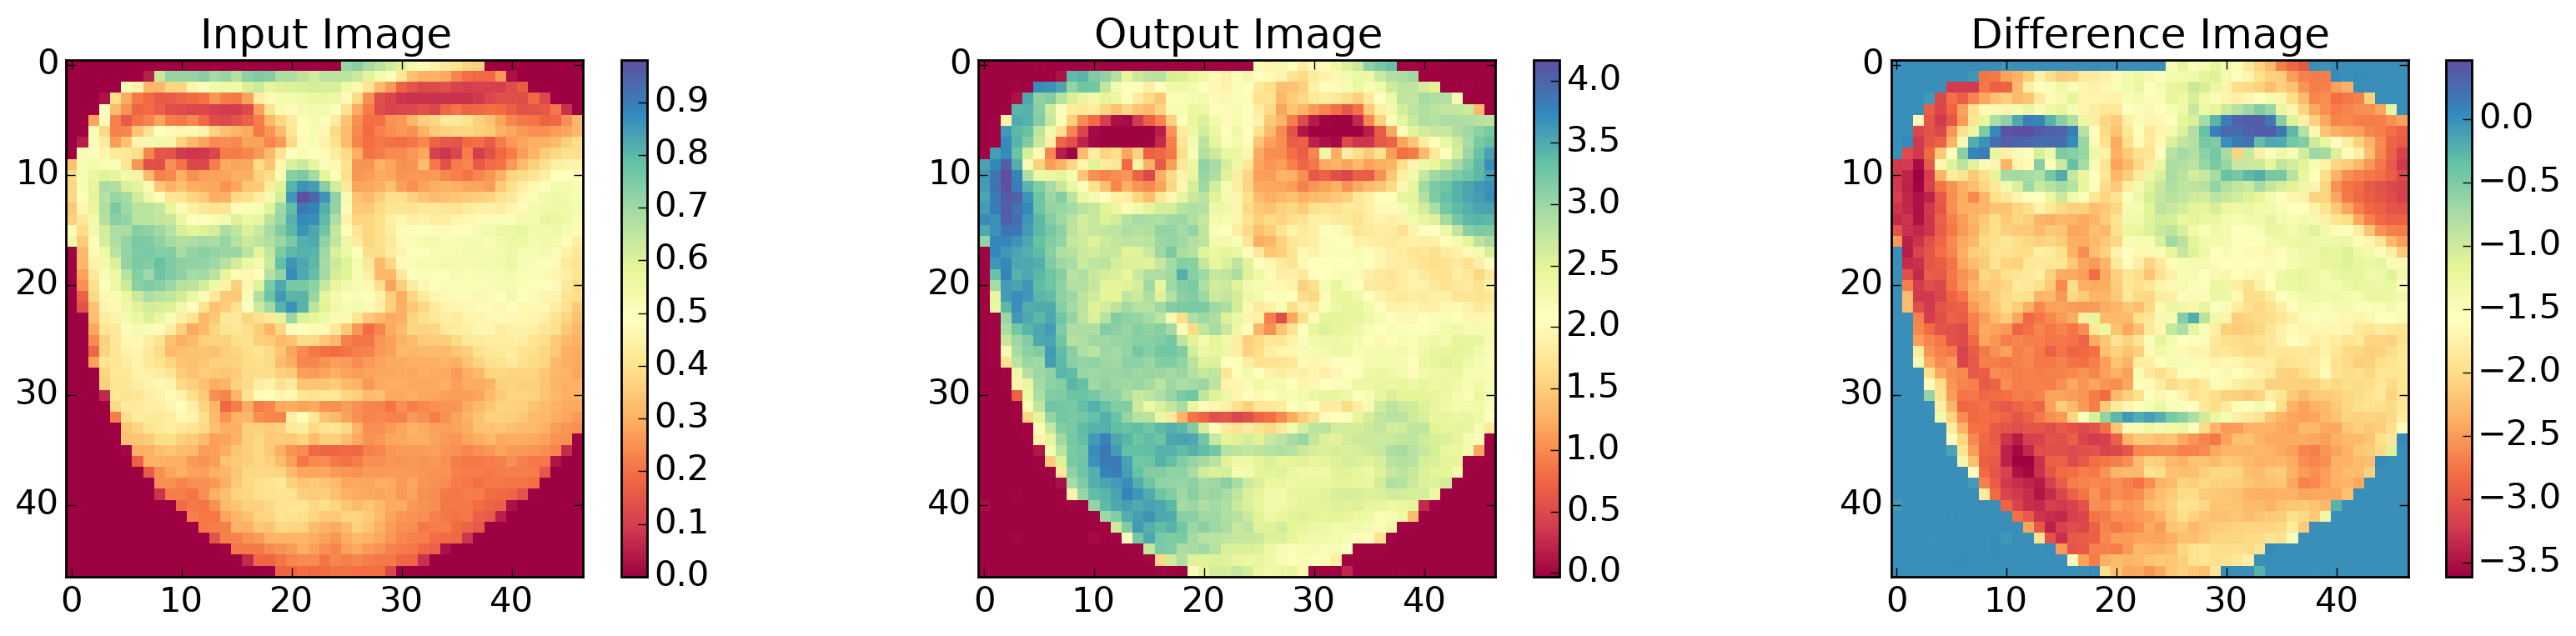

error =  128.37 %


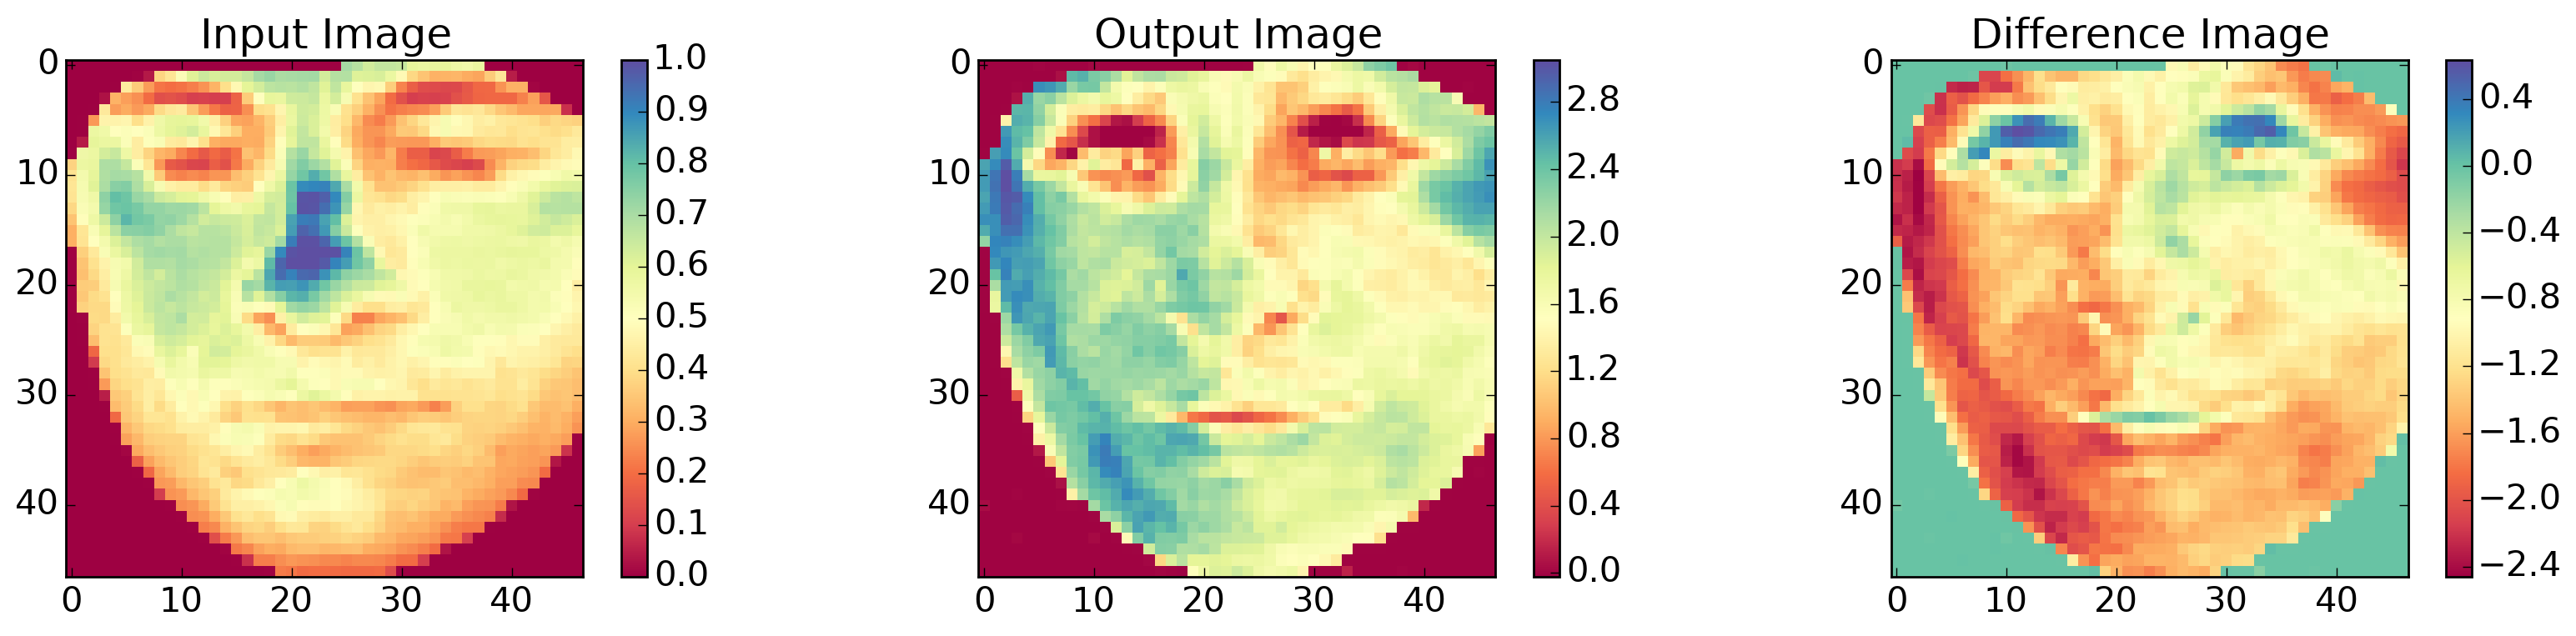

In [7]:
def auto_images(model,image,dataset):
    if dataset == 'train':
        input = model['auto_images'][0][0,image,:,:]
        output = model['auto_images'][0][1,image,:,:]
    else:
        input = model['auto_images'][1][0,image,:,:]
        output = model['auto_images'][1][1,image,:,:]
    diff = np.subtract(input,output)
    print 'error = ', round(np.sqrt((diff**2).mean())*100.0,2), '%'
    fig = plt.figure()
    cmap = 'Spectral'
    plt.subplot(131)
    plt.imshow(input,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
    plt.title('Input Image')
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(output,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
    plt.title('Output Image')
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(diff,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
    plt.title('Difference Image')
    plt.colorbar()
    plt.show()

i = 2
print 'early model'
auto_images(r.early_model,i,'train')
auto_images(r.early_model,i,'validation')


print 'final model'
auto_images(r.final_model,i,'train')
auto_images(r.final_model,i,'validation')

In [8]:
# from results import prefix
# from os.path import join
# path = join(join('/home/luka/v/lm1015-tmp/data',join(date,prefix(ID,3))),'results.html')
# !ipython nbconvert --to html results.ipynb
# !cp 'results.html' $path

/home/luka/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


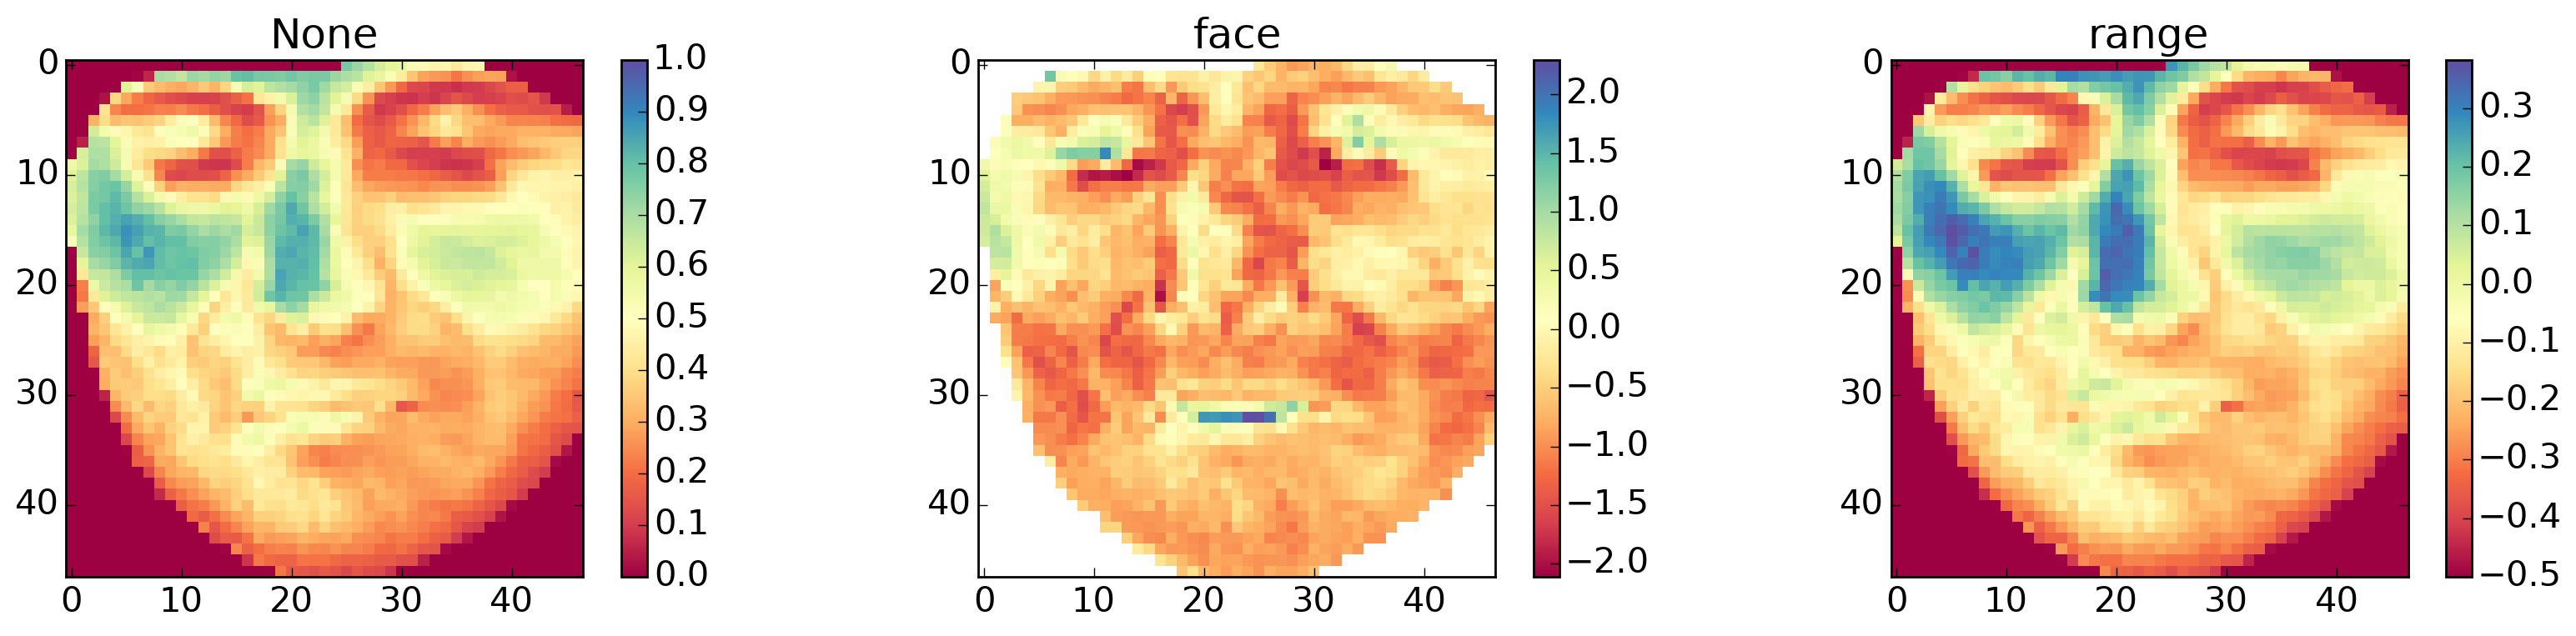

0.558179087388 -0.441820912612


In [28]:
allface = r.early_model['auto_images'][0][0,:,:,:]
mface = r.early_model['auto_images'][0][0,:,:,:].mean(axis=0)
sface = r.early_model['auto_images'][0][0,:,:,:].std(axis=0)

img = r.early_model['auto_images'][0][0,10,:,:]
img1 = img
img2 = (img - mface)/sface

range = allface.max() - allface.min()
img3 = img/range - 0.5*np.ones(img.shape)
img4 = mface


cmap = 'Spectral'

plt.subplot(131)
plt.imshow(img1,interpolation='none',cmap=cmap,vmin=0,vmax=1)
plt.title('None')
plt.colorbar()

plt.subplot(132)
plt.imshow(img2,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
plt.title('face')
plt.colorbar()

plt.subplot(133)
plt.imshow(img3,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
plt.title('range')
plt.colorbar()
plt.show()

N = allface.shape[0]
for i in xrange(sface.shape[0]):
    for j in xrange(sface.shape[1]):
        if sface[i,j] == 0.0:
            sface[i,j] = 1.0
            
for i in xrange(N):
    allface[i,:,:] = (allface[i,:,:] - mface)/sface

r1 = (allface.max() - allface.min())
print (allface/r1).max(), (allface/r1).min()